In [1]:
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


import numpy as np 
from cosmo import cosmology
from MassFunction import MassFunction


from HC_lognormal import dndm_spiky_broken_log as HCmass


Mass function for the HC scenario (for the constants see Sureda et al. 2021)

\begin{eqnarray}
&&\left(\frac{dn}{dM}\right)_{hc}=\frac{\rho_{DM}}{3\sqrt{2\pi}}\frac{\nu_{*}}{\, \nu_{m}^{3}} \left[2(n_b-n_s) C_{hc}^{n_b+3} M_{piv}^{-\frac{n_b+3}{2}}+ 
\right.\nonumber\\
&&(n_s+3)(\frac{1-n_b}{2})C_{hc}^{n_b+3}M^{-\frac{n_b+3}{2}}+\nonumber\\
&&\left(\frac{A_2}{ A_1 \sqrt{2\pi}\epsilon}\right)\frac{(n_s+3)(n_b+3)}{M_{piv}^{-(n_s-n_b)/2}} C_{hc}^{3+n_b-n_s} M_{p}^{-3/2}e^{\frac{9\epsilon^2}{2}}\nonumber \\ 
&& \left. e^-{\left(\frac{\log{C_{hc}M_p^{-\frac{1}{2}}}+3\epsilon^{2}-\log{C_{hc} M^{-\frac{1}{2}}}}{\sqrt{2}\epsilon}\right)^2}
 \right] e^{-\frac{1}{2}\left(\frac{\nu_{*}}{\nu_{m}}\right)^2 }\nonumber
\end{eqnarray}

where

\begin{eqnarray}
    &&\nu_{*}\equiv    \frac{\delta_c}{\sqrt{\frac{4\pi\,A_1\, (C_{hc}\,M_{piv})^{-(n_s-n_b)/2}}{(n_s+3)(n_b+3)} \left(\frac{G C_{hc}}{\pi c^2 f_m}\right)^4}} = \left[(n_b-n_s)C_{hc}^{n_b+3} M_{piv}^{-\frac{n_b+3}{2}} + (n_s+3)C_{hc}^{n_b+3}M_{*}^{\frac{1-n_b}{2}} +\right.\nonumber\\
    &&\left. \left(\frac{A_2}{2 A_1}\right)\frac{(n_s+3)(n_b+3)}{C_{hc }^{n_s-nb} M_{piv}^{-(n_s-n_b)/2}} C_{hc}^{3} M_p^{-3/2} e^{\frac{9\epsilon^2}{2}} \left(1- \mathrm{Erf}\left[\frac{\log{C_{hc}M_p^{-\frac{1}{2}}}+3\epsilon^{2}-\log{C_{hc} M_{*}^{-\frac{1}{2}}}}{\sqrt{2}\epsilon}\right]\right)\right]^{1/2} \nonumber\\
    \label{eq:sigmaM*_hc}
\end{eqnarray}

\begin{eqnarray}
    &&\nu_{m} = \left[(n_b-n_s)C_{hc}^{n_b+3} M_{piv}^{-\frac{n_b+3}{2}} + (n_s+3)C_{hc}^{n_b+3}M_{}^{\frac{1-n_b}{2}} +\right.\nonumber\\
    &&\left. \left(\frac{A_2}{2 A_1}\right)\frac{(n_s+3)(n_b+3)}{C_{hc }^{n_s-nb} M_{piv}^{-(n_s-n_b)/2}} C_{hc}^{3} M_p^{-3/2} e^{\frac{9\epsilon^2}{2}} \left(1- \mathrm{Erf}\left[\frac{\log{C_{hc}M_p^{-\frac{1}{2}}}+3\epsilon^{2}-\log{C_{hc} M_{}^{-\frac{1}{2}}}}{\sqrt{2}\epsilon}\right]\right)\right]^{1/2} \nonumber\\
    \label{eq:sigmaM_hc}
\end{eqnarray}

In [2]:
#First, we define a cosmological model, the default is that with the cosmological parameters estimated by Planck
cosmo = cosmology()

Cosmology defined with:
Om0 = 0.315  ;  Odm0 = 0.264  ;  Or0 = 9.237e-05  ;  h = 0.6736


In [3]:
# We give values to four free parameters: 
# M*: the characteristic mass where the distribution stars an exponential cut-off, 
# the blue index nb
# the position of the peak mass Mp
# the amplitud of the spike A2 
Ms1 = 50
nb1 = 2.0
Mp1=1e-1*Ms1
A2_1=1e23

In [4]:
# initialize the mass function
dndm_hc = lambda par: HCmass(par[0], a=1., cosmo=cosmo, M_star=par[1], nb=par[2], Mc=par[3], A2=par[4])
    
MF_log = MassFunction(dndm_hc,cosmo,Ms1,nb1,Mp1,A2=A2_1)


/home/aldebaran/Documents/primordial black holes/marzo2022/PBH-master_HC_FOF/m1ph.py:54: RuntimeWarning: divide by zero encountered in log10
  interpolation = interp1d(np.log10(Nden_values),loM_vals,fill_value = "extrapolate")


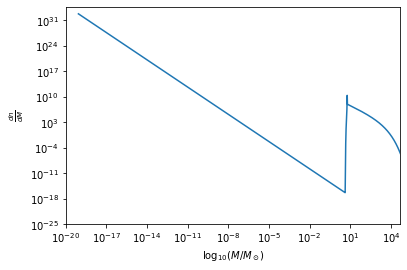

In [6]:
#Plotting the mass function
MF_log.plot(loy=1e-25)

The cumulative number density

\begin{equation}
    N_{PBH}(>M)= \int_M^\infty \frac{dn}{dM'}dM',
    \label{eq:cumulative number density}
\end{equation}


In [6]:
#we can calculate the cumulative number density between two limits at any scale factor
#the function returns a vector of logM and N(logM)

nden=MF_log.number_density(a=1,lo=np.log10(cosmo.Mev(0)),hi=np.log10(1e3*Ms1))

Text(0, 0.5, 'N(>M)')

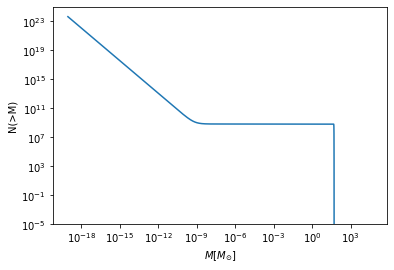

In [11]:
plt.plot(10**nden[0],nden[1])
plt.loglog()
plt.ylim(1e-5,1e25)
plt.xlabel(r'$M[M_{\odot}]$')
plt.ylabel('N(>M)')

In [12]:
# Given a Mp, we can calculate the amplitude A2 where the mass fraction inside in the spike is maximum
# The function returns a vector of all the posible amplitudes, the maximum A2 and an interpolation function
# which returns the mass fraction in the spike given the amplitude A2
a2maxt = MF_log.find_A2_max_restricted()
print('A2_max=%.1e frac_mass_max=%.1e'%(a2maxt[1], a2maxt[2](a2maxt[1])))

/home/aldebaran/Documents/primordial black holes/marzo2022/PBH-master_HC_FOF/HC_lognormal.py:309: RuntimeWarning: invalid value encountered in power
  num= np.power(x1mpivm + x1m + s4m, 1./2)


A2_max=9.9e+14 frac_mass_max=4.9e-01


In [13]:
#create a vector of Mp
array_pos=[1e-4,1e-3,1e-2,1e-1,0.5,1,10,1e2]
M0vec = [i * Ms1 for i in array_pos]

grid=len(M0vec)

In [15]:
fmass_max_M0=[]
A2max_M0=[]

for i in tqdm(range(grid)):
    MF = MassFunction(dndm_hc,cosmo,Ms1,nb1,M0vec[i])
    A2v=MF.find_A2_max_restricted()
    A2max_M0.append(A2v[1])
    fmass_max_M0.append(A2v[2](A2v[1]))

/home/aldebaran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/8 [00:00<?, ?it/s]

In [17]:
#Compute the fraction of PBH as dark matter using different observational constraints (see Sureda et al. 2021)


fpbh_udF=np.zeros(grid)
fpbh_udT=np.zeros(grid)



for i in tqdm(range(grid)):
   
  
    MF_logf = MassFunction(dndm_hc,cosmo,Ms1,nb1,M0vec[i],A2max_M0[i])
    MF_logt = MassFunction(dndm_hc,cosmo,Ms1,nb1,M0vec[i],A2max_M0[i])
       
    
    f_logf = MF_logf.compute_f(removedisputed=False)
    f_logt = MF_logt.compute_f(removedisputed=True)
   
    
    print("nb=%f Mc=%e As=%e fpbhf=%e is fpbht = %e"%(nb1,M0vec[i],MF_logf.A2,f_logf,f_logt))
    fpbh_udF[i]=f_logf
    fpbh_udT[i]=f_logt
    

/home/aldebaran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/8 [00:00<?, ?it/s]

nb=2.000000 Mc=5.000000e-03 As=9.715930e+19 fpbhf=1.688622e-03 is fpbht = 1.146442e-01
nb=2.000000 Mc=5.000000e-02 As=8.683071e+20 fpbhf=1.699464e-03 is fpbht = 1.641783e-01
nb=2.000000 Mc=5.000000e-01 As=4.488126e+21 fpbhf=1.682811e-03 is fpbht = 3.600589e-01
nb=2.000000 Mc=5.000000e+00 As=4.011013e+22 fpbhf=1.920178e-03 is fpbht = 1.984366e+00
nb=2.000000 Mc=2.500000e+01 As=2.073222e+23 fpbhf=4.837770e-04 is fpbht = 2.251648e+00
nb=2.000000 Mc=5.000000e+01 As=9.856941e+14 fpbhf=8.698159e-07 is fpbht = 8.698159e-07
nb=2.000000 Mc=5.000000e+02 As=1.523100e+16 fpbhf=8.649769e-07 is fpbht = 8.649769e-07
nb=2.000000 Mc=5.000000e+03 As=4.069227e+17 fpbhf=5.315259e-08 is fpbht = 9.536740e-07


In [19]:
#computation of fpbh without spike
MF_logA20 = MassFunction(dndm_hc,cosmo,Ms1,nb1,M0vec[0], A2=0)
f_logA20 = MF_logA20.compute_f(removedisputed=False)
print(f_logA20)

0.0016644810371541257


No handles with labels found to put in legend.


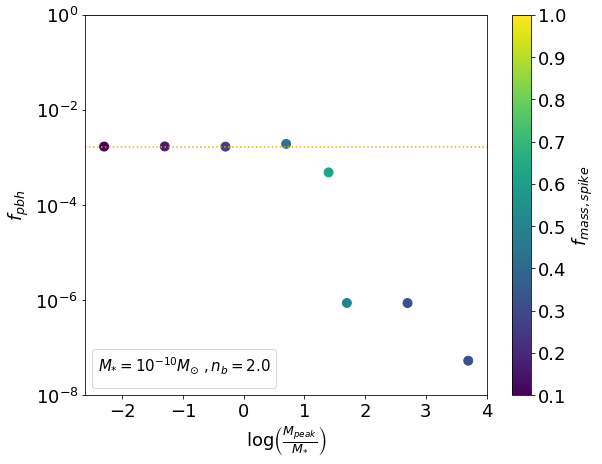

In [20]:
figf1=plt.figure(figsize=(9,7))
plt.scatter(np.log10(M0vec), fpbh_udF, c=fmass_max_M0, s=80, vmin=0.1, vmax=1)
plt.yscale('log')
plt.ylim(1e-8,1)
plt.axhline(f_logA20, color='orange',ls='dotted')
plt.axhline(1.0,color='0.5')
plt.xlabel(r'$\log\left(\frac{M_{peak}}{M_{*}}\right)$',fontsize=18)
plt.ylabel('$f_{pbh}$',fontsize=18)
cbar=plt.colorbar(label='$mass_{spike}$')
plt.legend(fontsize=14, title_fontsize=15,title=r'$M_{*}=10^{-10} M_{\odot}\;, n_{b}=%.1f$'%nb1,loc=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

cbar.ax.tick_params(labelsize=18) 
cbar.set_label(r'$f_{mass,spike}$',rotation=90,fontsize=18)
#cbar.ax.set_title(label='x',fontsize=24)

figf1.savefig("fpbh_spike.png")


Homework:

1) Compute the fpbh removing the disputed observational constraints for the previous example

2) Construct mass functions with a anoter blue index and three different Mp

3) Compute the Maximum amplitude A2 which provide the maximum mass fraction inside the spike

4) Compute the fpbh for all observational constraints and removing the disputed ones



5) Try to code the FCT mass function

\begin{eqnarray}
&&\left(\frac{dn}{dM}\right)_{fct}=\frac{\rho_{DM}}{3\sqrt{2\pi}}\frac{\nu_{*}}{\, \nu_{m}^{3}} \left[\frac{n_b+3}{n_s+3}C_{fct}^{n_b+3} M^{-\frac{n_b+9}{3}}+
\right.\nonumber\\
&&\left(\frac{A_2}{ A_1 \sqrt{2\pi}\epsilon}\right)\frac{(n_s+3)(n_b+3)}{M_{piv}^{-(n_s-n_b)/3}} C_{fct}^{3}  \frac{1}{M_p\,M^2}e^{\frac{9\epsilon^2}{2}}\nonumber \\ 
&&  \left. e^-{\left(\frac{\log{C_{fct}M_p^{-\frac{1}{3}}}+3\epsilon^{2}-\log{C_{fct} M^{-\frac{1}{3}}}}{\sqrt{2}\epsilon}\right)^2}
\right] e^{-\frac{1}{2}\left(\frac{\nu_{*}}{\nu_{m}}\right)^2 }\nonumber
\end{eqnarray}

\begin{eqnarray}
    &&\nu_{*}\equiv    \frac{\delta_c}{\sqrt{\frac{4\pi\,A_1\, a_{fct}^{4} C_{fct}^{3}M_{piv}^{-(n_s-n_b)/3}}{(n_s+3)(n_b+3)}}} = \left[(n_b-n_s)C_{fct}^{n_b+3} M_{piv}^{-\frac{n_b+3}{3}} + (n_s+3)C_{fct}^{n_b+3}M_{*}^{-\frac{n_b+3}{3}} +\right.\nonumber\\
    &&\left. \left(\frac{A_2}{2 A_1}\right)\frac{(n_s+3)(n_b+3)}{M_{piv}^{-(n_s-n_b)/3}} C_{fct}^{3} \frac{1}{M_p} e^{\frac{9\epsilon^2}{2}} \left(1- \mathrm{Erf}\left[\frac{\log{C_{fct}M_p^{-\frac{1}{3}}}+3\epsilon^{2}-\log{C_{fct} M_{*}^{-\frac{1}{3}}}}{\sqrt{2}\epsilon}\right]\right)\right]^{1/2} \nonumber\\
    \label{eq:sigmaM*}
\end{eqnarray}

\begin{eqnarray}
    &&\nu_{m} = \left[(n_b-n_s)C_{fct}^{n_b+3} M_{piv}^{-\frac{n_b+3}{3}} + (n_s+3)C_{fct}^{n_b+3}M_{}^{-\frac{n_b+3}{3}} +\right.\nonumber\\
    &&\left. \left(\frac{A_2}{2 A_1}\right)\frac{(n_s+3)(n_b+3)}{M_{piv}^{-(n_s-n_b)/3}} C_{fct}^{3} M_p^{-1} e^{\frac{9\epsilon^2}{2}} \left(1- \mathrm{Erf}\left[\frac{\log{C_{fct}M_p^{-\frac{1}{3}}}+3\epsilon^{2}-\log{C_{fct} M^{-\frac{1}{3}}}}{\sqrt{2}\epsilon}\right]\right)\right]^{1/2} \nonumber\\
    \label{eq:sigmam}
\end{eqnarray}